In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_site_scores = pd.read_csv('./Data/all_sites_scores.csv')
df_fandango = pd.read_csv('./Data/fandango_scrape.csv')

## Basic checking of datasets

In [3]:
df_site_scores.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


In [4]:
df_fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


In [5]:
df_site_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [6]:
df_fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [7]:
df_site_scores.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [8]:
df_fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [9]:
%matplotlib inline

## Checking relation between Votes and ratings
Most votes go to the 4-5 rating range, very few votes for low ratings

Text(0.5, 1.0, 'Fandango Ratings vs Votes')

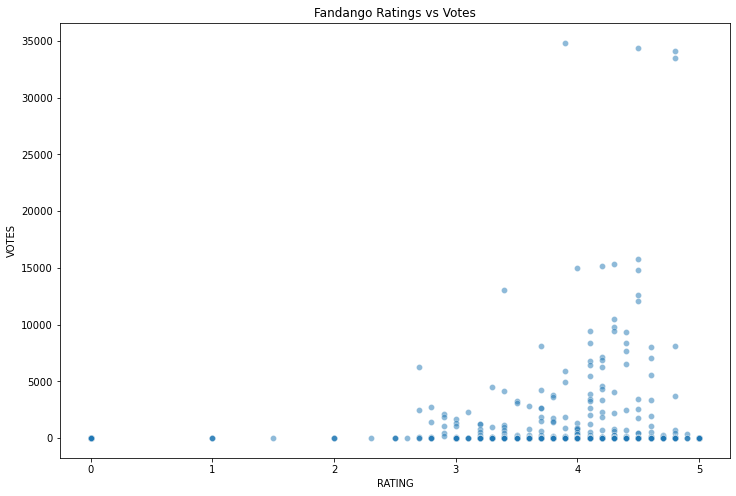

In [10]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df_fandango,x='RATING',y='VOTES',alpha=0.5)
plt.title('Fandango Ratings vs Votes')

## Checking correlations
Rating and stars should be highly correlated

In [11]:
df_fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


## Putting the date into its own column

In [12]:
def year_split(name):
    year = name[-5:-1]
    return int(year)

df_fandango['year'] = np.vectorize(year_split)(df_fandango['FILM'])
df_fandango.tail()

,FILM,STARS,RATING,VOTES,year
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964
503,Zarafa (2012),0.0,0.0,0,2012


In [13]:
df_fandango['year'].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: year, dtype: int64

## Most movies are in 2012-2016 range with one odd movie from 1964
Just creating a plot for the value count above

(2012.0, 2015.0)

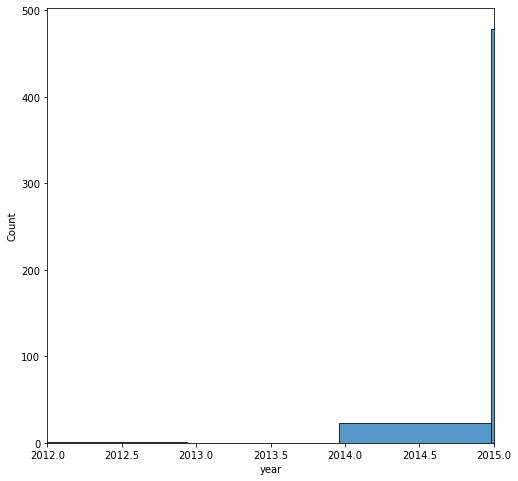

In [62]:
plt.figure(figsize=(8,8))
sns.histplot(data=df_fandango,x='year',bins=51)
plt.xlim(2012,2015)

## Showing the top 10 voted movies

In [15]:
df_fandango.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,year
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


## Checking movies with zero votes

In [63]:
df_fandango[df_fandango['VOTES']==0]

,FILM,STARS,RATING,VOTES,year,diff
435,6 Years (2015),0.0,0.0,0,2015,0.0
436,7 Minutes (2015),0.0,0.0,0,2015,0.0
437,A Year in Champagne (2015),0.0,0.0,0,2015,0.0
438,Balls Out (2015),0.0,0.0,0,2015,0.0
439,Before I Wake (2015),0.0,0.0,0,2015,0.0
...,...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015,0.0
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015,0.0
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015,0.0
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964,0.0


In [16]:
len(df_fandango[df_fandango['VOTES']==0])

69

## Dropping the 69 movies with zero votes

In [17]:
df_crop_fand = df_fandango[df_fandango['VOTES']>0]
df_crop_fand.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435 entries, 0 to 434
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    435 non-null    object 
 1   STARS   435 non-null    float64
 2   RATING  435 non-null    float64
 3   VOTES   435 non-null    int64  
 4   year    435 non-null    int32  
dtypes: float64(2), int32(1), int64(1), object(1)
memory usage: 18.7+ KB


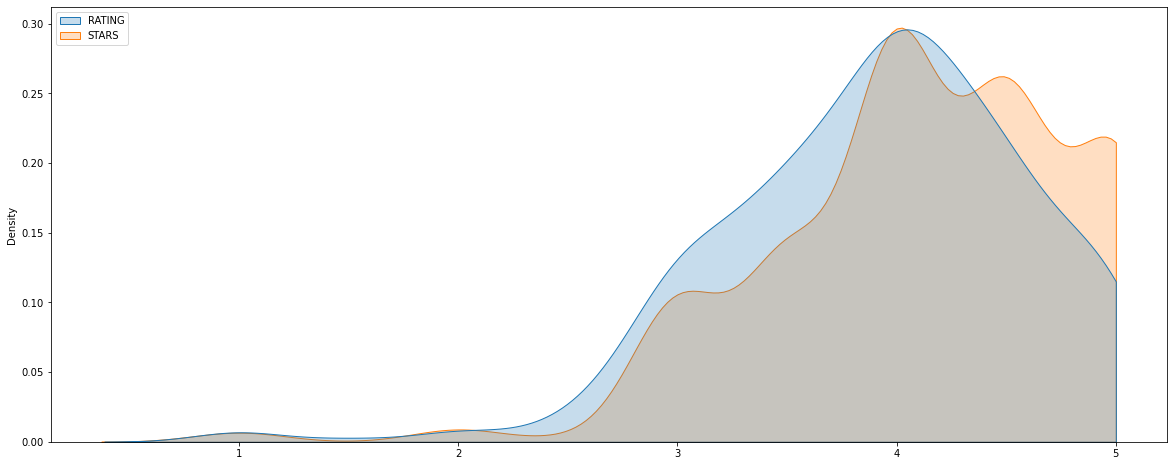

In [57]:
plt.figure(figsize=(20,8))
ax = sns.kdeplot(data=df_crop_fand[['RATING','STARS']],fill=True,clip=(0,5))
sns.move_legend(ax, loc='upper left')

## Distributions skewed towards higher side, Stars is further shifted to the higher side compared with user ratings

## Finding the differences between ratings and stars

In [19]:
df_fandango['diff'] = df_fandango['STARS']-df_fandango['RATING']
df_fandango['diff'] = df_fandango['diff'].round(2)

Text(0.5, 1.0, 'Difference between Stars and Ratings for Fandango')

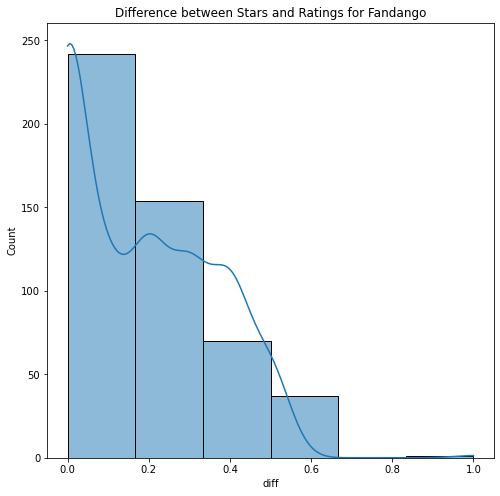

In [74]:
plt.figure(figsize=(8,8))
sns.histplot(data=df_fandango,x='diff',kde=True,bins=6)
plt.title('Difference between Stars and Ratings for Fandango')

## Skewed towards positive values, nothing is negative, should have seen some negative ratings as well

<AxesSubplot:xlabel='diff', ylabel='count'>

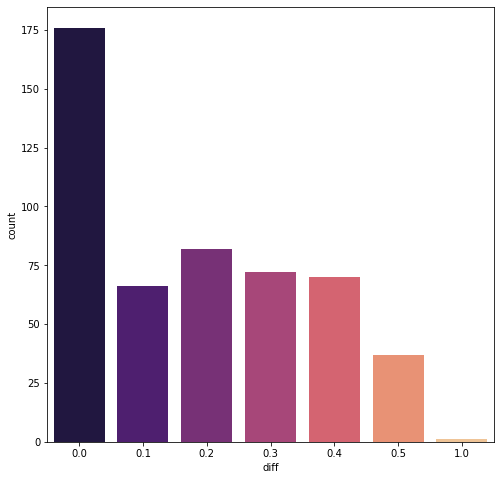

In [20]:
plt.figure(figsize=(8,8))
sns.countplot(data=df_fandango,x='diff',palette='magma')`

In [21]:
df_fandango['diff'].value_counts()

0.0    176
0.2     82
0.3     72
0.4     70
0.1     66
0.5     37
1.0      1
Name: diff, dtype: int64

## A movie has a full star higher compared with ratings

In [22]:
df_fandango[df_fandango['diff']==1]

,FILM,STARS,RATING,VOTES,year,diff
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


## Comparision of Fandango Rating to other sites

In [23]:
df_site_scores.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [24]:
df_site_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


(0.0, 100.0)

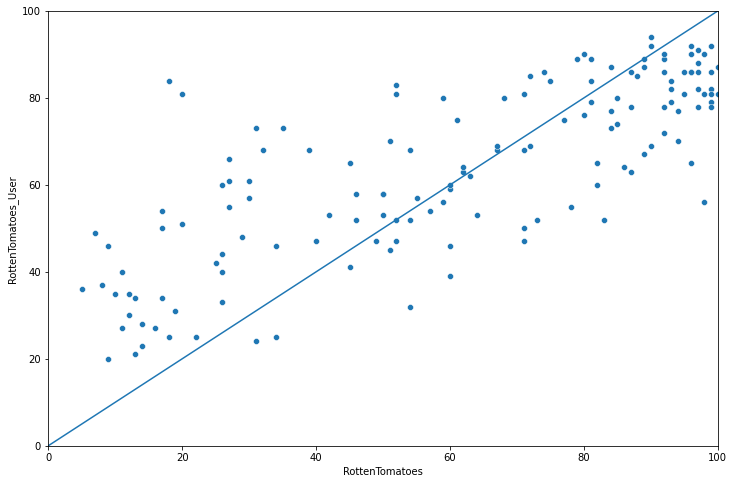

In [88]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(data=df_site_scores,x='RottenTomatoes',y='RottenTomatoes_User')
ax= plt.axline((0, 0),(100,100), color='C0')
plt.xlim(0,100)
plt.ylim(0,100)

## Users tend to rate some movies higher especially on the lower end where critics hated them

In [26]:
df_site_scores['rotten_diff'] = df_site_scores['RottenTomatoes']-df_site_scores['RottenTomatoes_User']
print('Min value is',df_site_scores['rotten_diff'].min())
print('Max value is',df_site_scores['rotten_diff'].max())

Min value is -66
Max value is 42


In [27]:
df_site_scores['rotten_diff_abs'] = df_site_scores['rotten_diff'].abs()
print('Min value is',df_site_scores['rotten_diff_abs'].min())
print('Max value is',df_site_scores['rotten_diff_abs'].max())

Min value is 0
Max value is 66


In [28]:
print('Mean value of the difference between critics-users is',df_site_scores['rotten_diff_abs'].mean())
print('Median value of the difference between critics-users is',df_site_scores['rotten_diff_abs'].median())

Mean value of the difference between critics-users is 15.095890410958905
Median value of the difference between critics-users is 12.0


Text(0.5, 1.0, 'RT Critics score minue RT User scores')

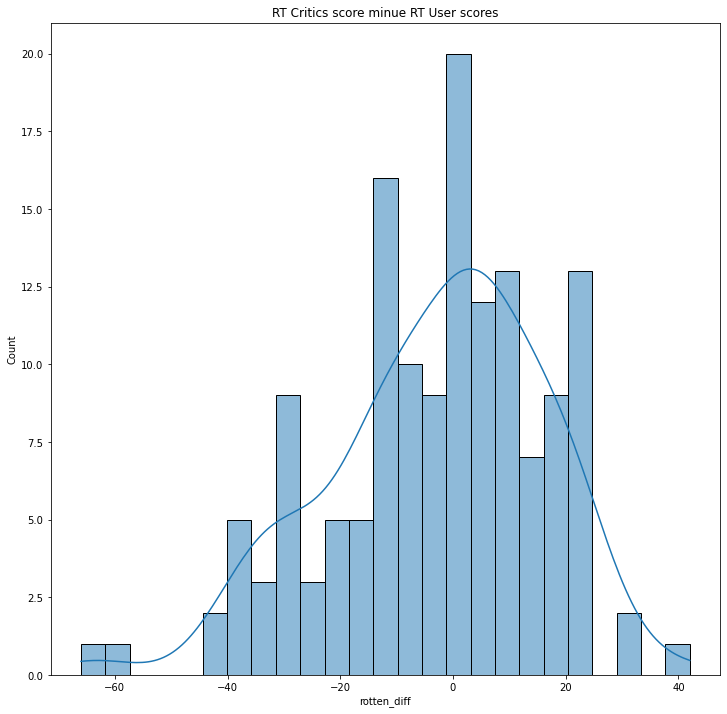

In [29]:
plt.figure(figsize=(12,12))
sns.histplot(data=df_site_scores,x=df_site_scores['rotten_diff'],kde=True,bins=25)
plt.title('RT Critics score minue RT User scores')

## Difference is more palatable, seems mostly centered around 0, with a longer tail towards the negative, considering critics are harsher compared with viewers

Text(0.5, 1.0, 'RT Critics score minue RT User scores Absolute values')

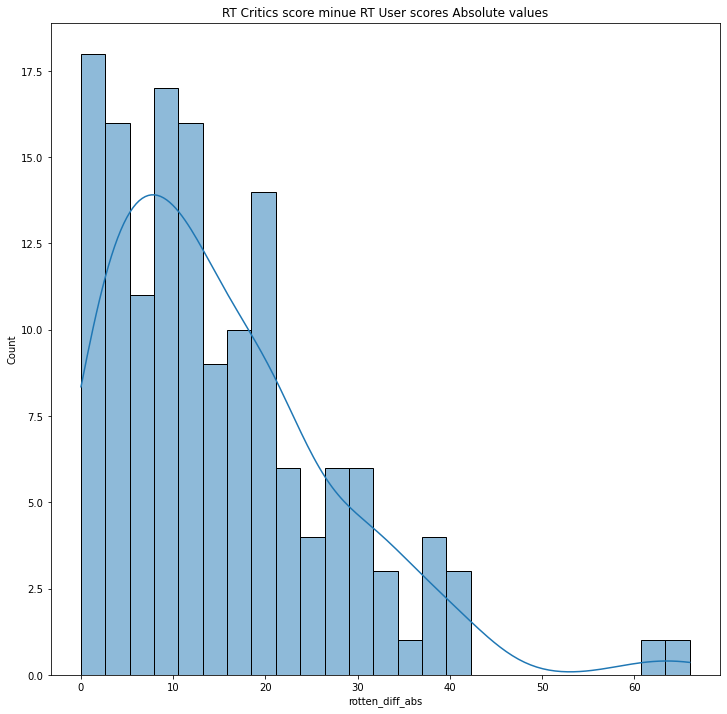

In [30]:
plt.figure(figsize=(12,12))
sns.histplot(data=df_site_scores,x=df_site_scores['rotten_diff_abs'],kde=True,bins=25)
plt.title('RT Critics score minue RT User scores Absolute values')

## Pick the tail ends of the differences, ie movies with largest negative and positive differences

In [31]:
df_site_scores.nsmallest(5,'rotten_diff')[['FILM','rotten_diff']]

,FILM,rotten_diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


In [32]:
df_site_scores.nlargest(5,'rotten_diff')[['FILM','rotten_diff']]

,FILM,rotten_diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


(0.0, 10.0)

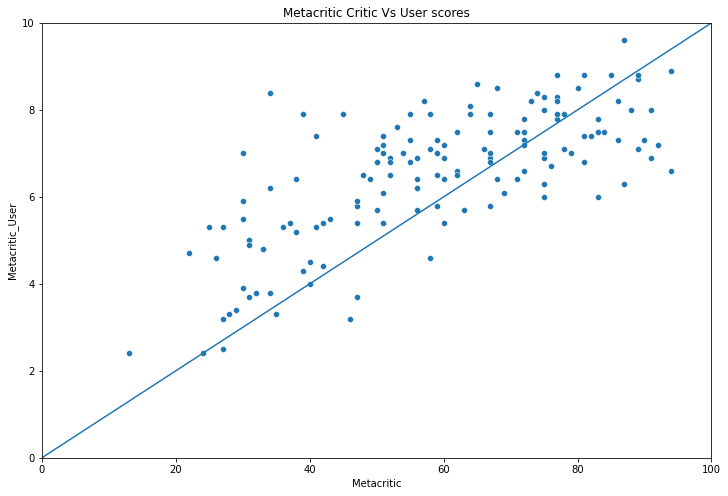

In [89]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(data=df_site_scores,x='Metacritic',y='Metacritic_User')
ax= plt.axline((0, 0),(100,10), color='C0')
plt.title('Metacritic Critic Vs User scores')
plt.xlim(0,100)
plt.ylim(0,10)

## Users tend to rate movies higher here as well

## Checking vote count between IMDB and Metacritic

Text(0.5, 1.0, 'Metacritic Vote count Vs Imdb vote count')

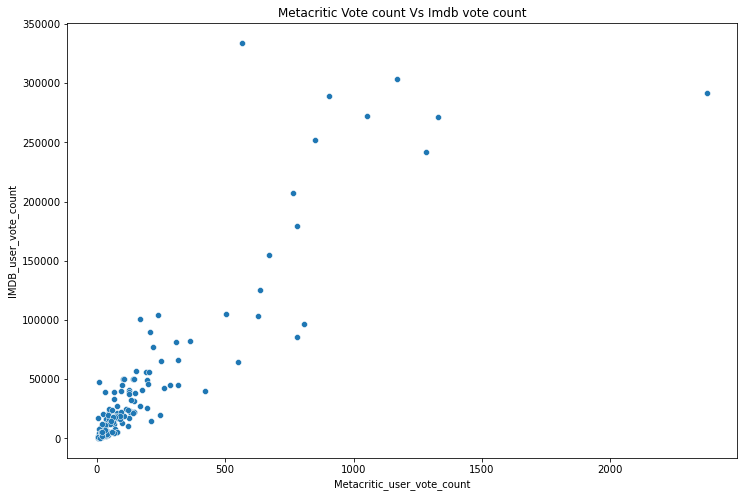

In [34]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df_site_scores,x='Metacritic_user_vote_count',y='IMDB_user_vote_count')
plt.title('Metacritic Vote count Vs Imdb vote count')

## Get the movie with highest metacritic votes

In [35]:
df_site_scores.nlargest(1,'Metacritic_user_vote_count')[['FILM','Metacritic_user_vote_count','IMDB_user_vote_count']]

,FILM,Metacritic_user_vote_count,IMDB_user_vote_count
88,Mad Max: Fury Road (2015),2375,292023


## Get the movie with highest IMDB votes

In [36]:
df_site_scores.nlargest(1,'IMDB_user_vote_count')[['FILM','Metacritic_user_vote_count','IMDB_user_vote_count']]

,FILM,Metacritic_user_vote_count,IMDB_user_vote_count
14,The Imitation Game (2014),566,334164


## Merge all the data

In [37]:
df_merge = pd.merge(df_fandango,df_site_scores,how='inner',on='FILM')
df_merge

,FILM,STARS,RATING,VOTES,year,diff,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,rotten_diff,rotten_diff_abs
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1,25,42,46,3.2,4.2,778,179506,-17,17
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0,71,81,59,7.0,7.3,1281,241807,-10,10
2,American Sniper (2015),5.0,4.8,34085,2015,0.2,72,85,72,6.6,7.4,850,251856,-13,13
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2,81,84,67,6.8,7.4,764,207211,-3,3
4,Inside Out (2015),4.5,4.5,15749,2015,0.0,98,90,94,8.9,8.6,807,96252,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,0.0,87,63,68,6.4,6.7,19,5289,24,24
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,0.4,95,81,87,6.3,7.0,18,1107,14,14
142,The Wrecking Crew (2015),4.5,4.2,38,2015,0.3,93,84,67,7.0,7.8,4,732,9,9
143,Tangerine (2015),4.0,3.9,36,2015,0.1,95,86,86,7.3,7.4,14,696,9,9


In [38]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   year                        145 non-null    int32  
 5   diff                        145 non-null    float64
 6   RottenTomatoes              145 non-null    int64  
 7   RottenTomatoes_User         145 non-null    int64  
 8   Metacritic                  145 non-null    int64  
 9   Metacritic_User             145 non-null    float64
 10  IMDB                        145 non-null    float64
 11  Metacritic_user_vote_count  145 non-null    int64  
 12  IMDB_user_vote_count        145 non-null    int64  
 13  rotten_diff                 145 non

## Normalize ratings

In [39]:
df_merge['RottenTomatoes'] = np.round(df_merge['RottenTomatoes']/20,1)
df_merge['RottenTomatoes_User'] = np.round(df_merge['RottenTomatoes_User']/20,1)
df_merge['Metacritic'] = np.round(df_merge['Metacritic']/20,1)
df_merge['Metacritic_User'] = np.round(df_merge['Metacritic_User']/2,1)
df_merge['IMDB'] = np.round(df_merge['IMDB']/2,1)

In [40]:
df_merge['RottenTomatoes'] = df_merge['RottenTomatoes'].round(2)
df_merge['RottenTomatoes_User'] = df_merge['RottenTomatoes_User'].round(2)
df_merge['Metacritic'] = df_merge['Metacritic'].round(2)
df_merge.head()

,FILM,STARS,RATING,VOTES,year,diff,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,rotten_diff,rotten_diff_abs
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1,1.2,2.1,2.3,1.6,2.1,778,179506,-17,17
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0,3.6,4.0,3.0,3.5,3.6,1281,241807,-10,10
2,American Sniper (2015),5.0,4.8,34085,2015,0.2,3.6,4.2,3.6,3.3,3.7,850,251856,-13,13
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2,4.0,4.2,3.4,3.4,3.7,764,207211,-3,3
4,Inside Out (2015),4.5,4.5,15749,2015,0.0,4.9,4.5,4.7,4.4,4.3,807,96252,8,8


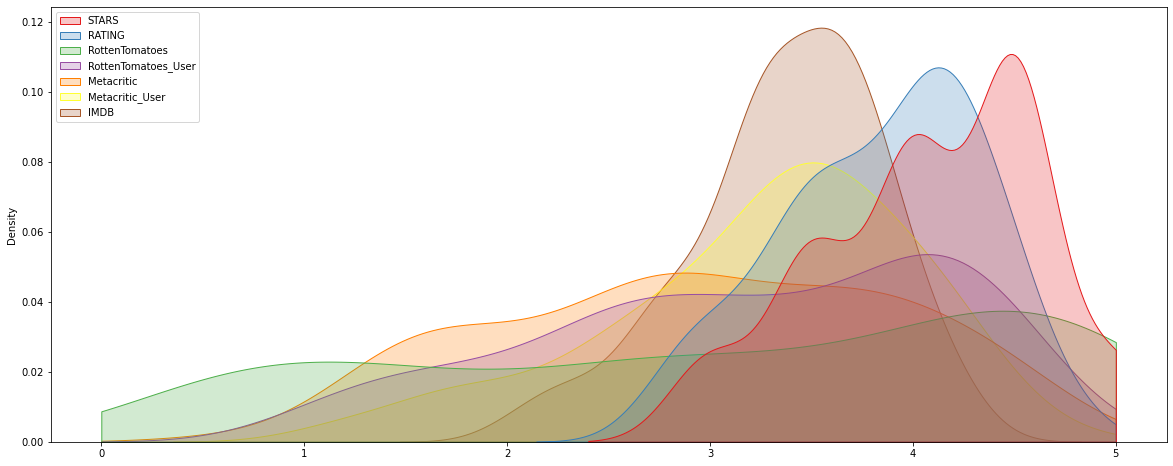

In [52]:
plt.figure(figsize=(20,8))
ax = sns.kdeplot(data=df_merge[['STARS','RATING','RottenTomatoes','RottenTomatoes_User','Metacritic','Metacritic_User','IMDB']],fill=True,clip=(0,5),palette='Set1')
sns.move_legend(ax, loc='upper left')

## Stars and ratings from Fandango skewed towards higher end compared with rest

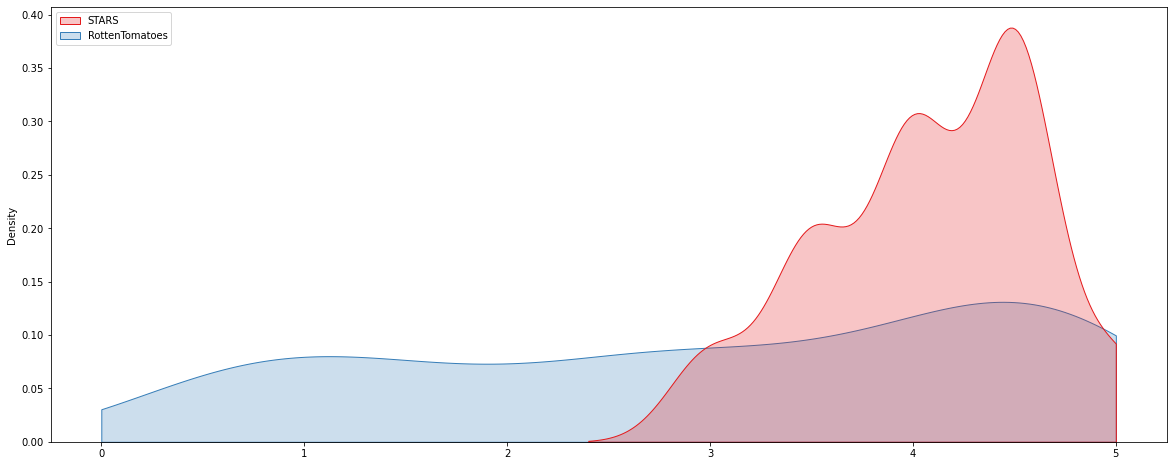

In [55]:
plt.figure(figsize=(20,8))
ax = sns.kdeplot(data=df_merge[['STARS','RottenTomatoes']],fill=True,clip=(0,5),palette='Set1')
sns.move_legend(ax, loc='upper left')

<AxesSubplot:ylabel='Count'>

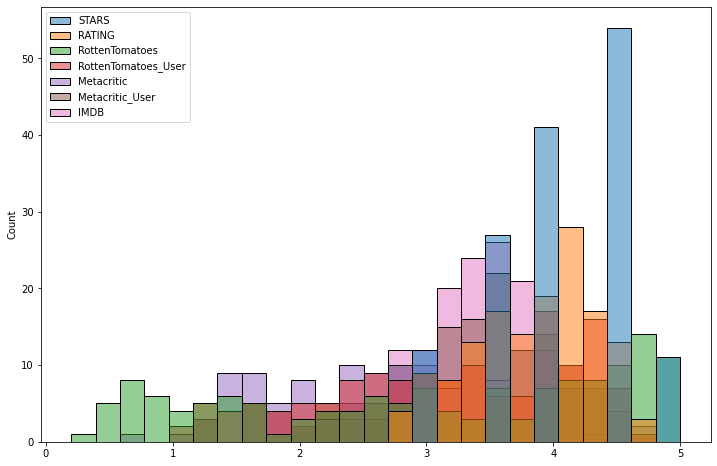

In [130]:
data_scores= df_merge[['STARS','RATING','RottenTomatoes','RottenTomatoes_User','Metacritic','Metacritic_User','IMDB']]
plt.figure(figsize=(12,8))
sns.histplot(data_scores,bins=25)

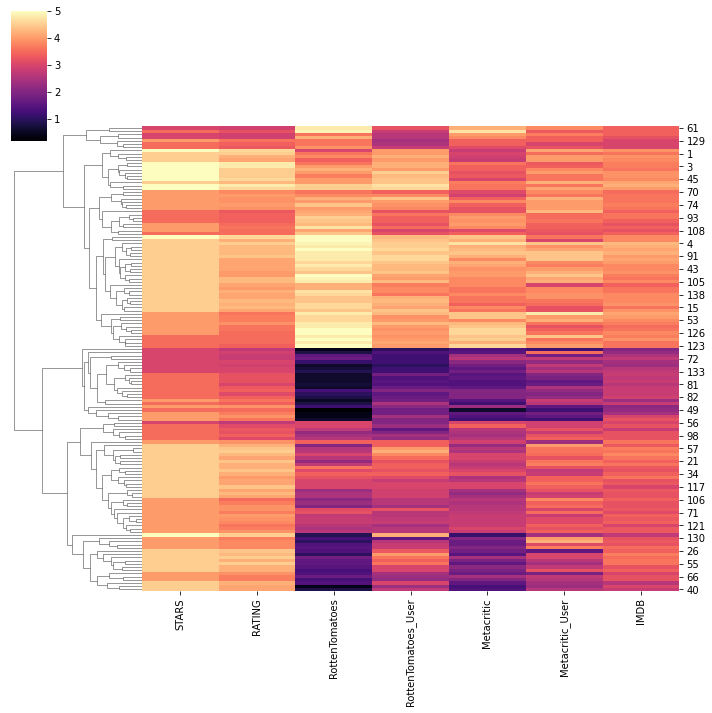

In [131]:
sns.clustermap(data_scores,cmap='magma',col_cluster=False)

## Bad clusters can be seen on other site ratings,fandango seems to have min of 3 stars

In [59]:
data_worst = df_merge.nsmallest(10,'RottenTomatoes')[['STARS','RATING','RottenTomatoes','RottenTomatoes_User','Metacritic','Metacritic_User','IMDB','FILM']]
data_worst

,STARS,RATING,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,FILM
49,3.5,3.5,0.2,1.8,0.6,1.2,2.2,Paul Blart: Mall Cop 2 (2015)
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015)
28,3.0,2.7,0.4,1.0,1.4,1.2,2.0,Fantastic Four (2015)
54,4.0,3.7,0.4,1.8,1.6,1.8,2.4,Hot Pursuit (2015)
84,4.0,3.9,0.4,2.4,1.4,1.6,3.0,Hitman: Agent 47 (2015)
50,4.0,3.6,0.5,1.8,1.5,2.8,2.3,The Boy Next Door (2015)
77,3.5,3.2,0.6,1.8,1.5,2.0,2.8,Seventh Son (2015)
78,3.5,3.2,0.6,1.5,1.4,1.6,2.8,Mortdecai (2015)
83,3.5,3.3,0.6,1.7,1.6,2.5,2.8,Sinister 2 (2015)
87,3.5,3.2,0.6,1.4,1.6,1.9,2.7,Unfinished Business (2015)


## Seems much worse most are 3.5 to 4.5 stars, lets plot the worst data

<AxesSubplot:ylabel='Density'>

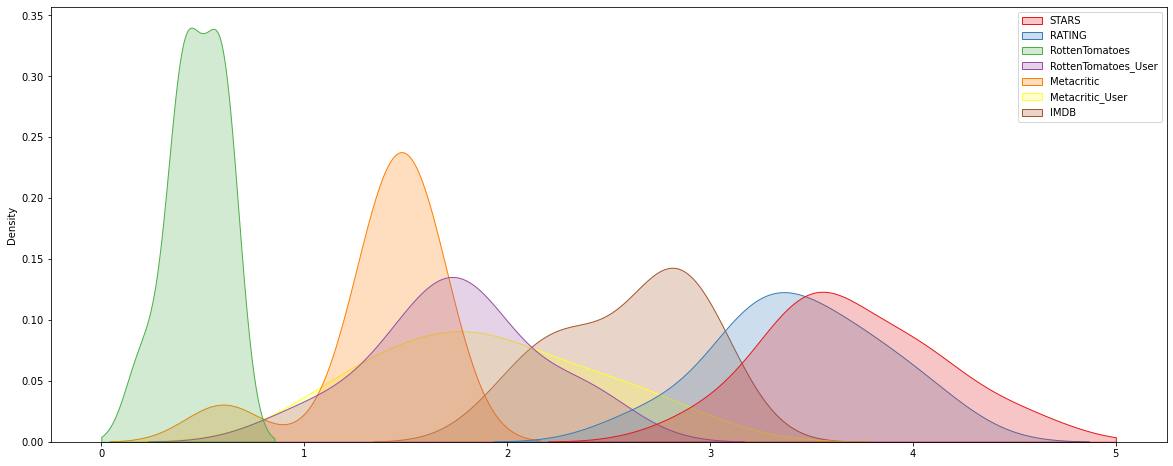

In [91]:
plt.figure(figsize=(20,8))
sns.kdeplot(data=data_worst,fill=True,clip=(0,5),palette='Set1')

## Critics from rotten tomate gave them ~0.5, users around 1.5
## Metacritic seems a bit higher, users here are similar to rotten tomatoes
## Imdb is a bit high
## Rotten tomatoes seems the highest rated values

In [61]:
data_worst.iloc[1]

STARS                             4.5
RATING                            4.1
RottenTomatoes                    0.4
RottenTomatoes_User               2.3
Metacritic                        1.3
Metacritic_User                   2.3
IMDB                              3.0
FILM                   Taken 3 (2015)
Name: 25, dtype: object

## The worst offender